Epoch 1/10
117/117 [==============================] - 5s 14ms/step - loss: 2.1957 - accuracy: 0.9775 - val_loss: 0.0695 - val_accuracy: 1.0000
Epoch 2/10
117/117 [==============================] - 1s 10ms/step - loss: 3.2589 - accuracy: 0.9995 - val_loss: 0.0730 - val_accuracy: 1.0000
Epoch 3/10
117/117 [==============================] - 1s 11ms/step - loss: 1.5747 - accuracy: 0.9995 - val_loss: 0.0868 - val_accuracy: 1.0000
Epoch 4/10
117/117 [==============================] - 1s 12ms/step - loss: 1.5140 - accuracy: 0.9995 - val_loss: 0.0958 - val_accuracy: 1.0000
Epoch 5/10
117/117 [==============================] - 1s 11ms/step - loss: 1.3093 - accuracy: 0.9995 - val_loss: 0.1085 - val_accuracy: 1.0000
Epoch 6/10
117/117 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.9997 - val_loss: 0.1206 - val_accuracy: 1.0000
Epoch 7/10
117/117 [==============================] - 2s 14ms/step - loss: 1.0115 - accuracy: 0.9987 - val_loss: 0.1465 - val_accuracy: 0.9989


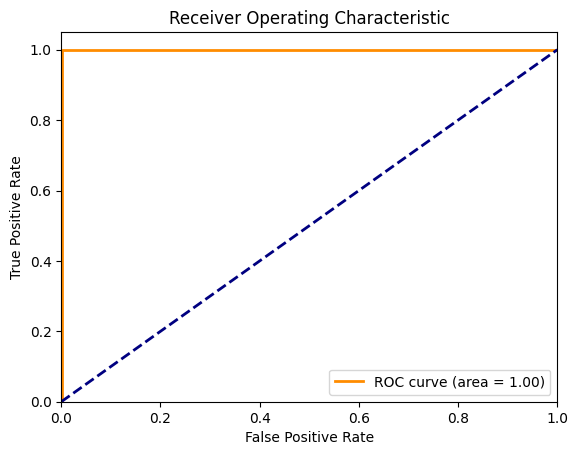

In [ ]:
#CNN Plotting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess dataset
dataset = pd.read_csv("creditcard.csv")
dataset = dataset.dropna(subset=['Class'])
X = dataset.drop(columns=["Class"])
y = dataset["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

class_weights_array = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}

# Build and compile model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weights, callbacks=[early_stopping])

# Predict and evaluate model
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# CNN code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np


dataset = pd.read_csv("creditcard.csv")


dataset = dataset.dropna(subset=['Class'])

X = dataset.drop(columns=["Class"])
y = dataset["Class"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

class_weights_array = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}
#model building
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weights, callbacks=[early_stopping])


y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Epoch 1/10
467/467 [==============================] - 3s 4ms/step - loss: 0.2805 - accuracy: 0.9462 - val_loss: 0.1340 - val_accuracy: 0.9971
Epoch 2/10
467/467 [==============================] - 2s 4ms/step - loss: 0.2132 - accuracy: 0.9882 - val_loss: 0.1111 - val_accuracy: 0.9971
Epoch 3/10
467/467 [==============================] - 2s 4ms/step - loss: 0.1356 - accuracy: 0.9887 - val_loss: 0.0729 - val_accuracy: 0.9973
Epoch 4/10
467/467 [==============================] - 2s 4ms/step - loss: 0.1153 - accuracy: 0.9881 - val_loss: 0.0859 - val_accuracy: 0.9949
Epoch 5/10
467/467 [==============================] - 2s 4ms/step - loss: 0.1075 - accuracy: 0.9881 - val_loss: 0.0916 - val_accuracy: 0.9904
Epoch 6/10
467/467 [==============================] - 3s 6ms/step - loss: 0.0943 - accuracy: 0.9886 - val_loss: 0.1173 - val_accuracy: 0.9820
Epoch 7/10
467/467 [==============================] - 2s 4ms/step - loss: 0.0960 - accuracy: 0.9822 - val_loss: 0.1122 - val_accuracy: 0.9810
Epoch 

NameError: name 'roc_curve' is not defined

In [ ]:
 659import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
import numpy as np

# Load the dataset
dataset = pd.read_csv("creditcard.csv")

# Drop rows where the target variable 'Class' is NaN
dataset = dataset.dropna(subset=['Class'])
X = dataset.drop(columns=["Class"])
y = dataset["Class"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle missing values n
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE to balance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Reshape data for RNN
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Epoch 1/10
10893/10893 [==============================] - 105s 10ms/step - loss: 0.0713 - accuracy: 0.9751 - val_loss: 0.0625 - val_accuracy: 0.9785
Epoch 2/10
10893/10893 [==============================] - 103s 9ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0079 - val_accuracy: 0.9991
Epoch 3/10
10893/10893 [==============================] - 107s 10ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0963 - val_accuracy: 0.9710
Epoch 4/10
10893/10893 [==============================] - 95s 9ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.0337 - val_accuracy: 0.9886
Epoch 5/10
10893/10893 [==============================] - 96s 9ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0198 - val_accuracy: 0.9953
Epoch 6/10
10893/10893 [==============================] - 95s 9ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0314 - val_accuracy: 0.9899
Epoch 7/10
10893/10893 [==============================] - 93s 9ms/step - loss: 0.0251 - accuracy: 0.9923 - val_lo

Epoch 1/10
4646/4646 [==============================] - 40s 8ms/step - loss: 0.0527 - accuracy: 0.9823 - val_loss: 0.0192 - val_accuracy: 0.9951
Epoch 2/10
4646/4646 [==============================] - 41s 9ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0300 - val_accuracy: 0.9881
Epoch 3/10
4646/4646 [==============================] - 36s 8ms/step - loss: 0.0173 - accuracy: 0.9950 - val_loss: 0.0039 - val_accuracy: 0.9997
Epoch 4/10
4646/4646 [==============================] - 38s 8ms/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 0.0028 - val_accuracy: 0.9998
Epoch 5/10
4646/4646 [==============================] - 35s 8ms/step - loss: 0.0181 - accuracy: 0.9951 - val_loss: 0.0050 - val_accuracy: 0.9991
Epoch 6/10
4646/4646 [==============================] - 36s 8ms/step - loss: 0.0168 - accuracy: 0.9956 - val_loss: 0.0229 - val_accuracy: 0.9955
Epoch 7/10
4646/4646 [==============================] - 36s 8ms/step - loss: 0.0159 - accuracy: 0.9959 - val_loss: 0.0092 - val_ac

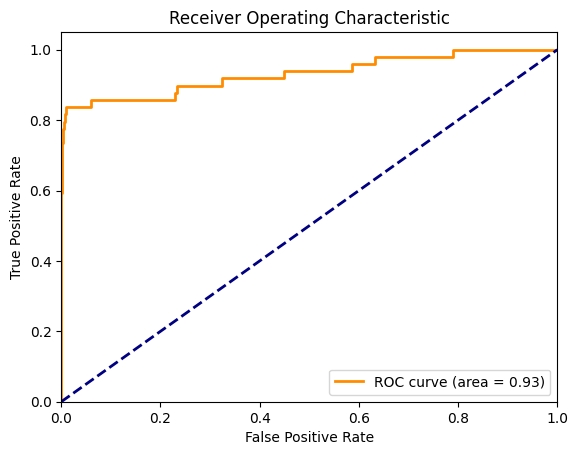

In [ ]:
#RNN plotting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("creditcard.csv")

# Drop rows where the target variable 'Class' is NaN
dataset = dataset.dropna(subset=['Class'])
X = dataset.drop(columns=["Class"])
y = dataset["Class"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE to balance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Reshape data for RNN
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#RNN for given input
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
import numpy as np

# Load the dataset
dataset = pd.read_csv("creditcard.csv")

# Drop rows where the target variable 'Class' is NaN
dataset = dataset.dropna(subset=['Class'])
X = dataset.drop(columns=["Class"])
y = dataset["Class"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE to balance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Reshape data for RNN
X_train_resampled = X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Function to preprocess user input and make a prediction
def preprocess_and_predict(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Handle missing values
    input_imputed = imputer.transform(input_df)

    # Scale the input data
    input_scaled = scaler.transform(input_imputed)

    # Reshape for RNN
    input_reshaped = input_scaled.reshape((input_scaled.shape[0], input_scaled.shape[1], 1))

    # Make prediction
    prediction = model.predict(input_reshaped)
    prediction_class = (prediction > 0.5).astype("int32")

    return "Yes" if prediction_class[0][0] == 1 else "No"

# Example usage: user_input should be a dictionary matching the feature names
# Example dictionary:
# user_input = {
#     'Time': 1000,
#     'V1': -1.3598071336738,
#     'V2': -0.0727811733098497,
#     'V3': 2.53634673796914,
#     'V4': 1.37815522427443,
#     'V5': -0.338320769942518,
#     'V6': 0.462387777762292,
#     'V7': 0.239598554061257,
#     'V8': 0.0986979012610507,
#     'V9': 0.363786969611213,
#     'V10': 0.0907941719789316,
#     'V11': -0.551599533260813,
#     'V12': -0.617800855762348,
#     'V13': -0.991389847235408,
#     'V14': -0.311169353699879,
#     'V15': 1.46817697209427,
#     'V16': -0.470400525259478,
#     'V17': 0.207971241929242,
#     'V18': 0.0257905801985591,
#     'V19': 0.403992960255733,
#     'V20': 0.251412098239705,
#     'V21': -0.018306777944153,
#     'V22': 0.277837575558899,
#     'V23': -0.110473910188767,
#     'V24': 0.0669280749146731,
#     'V25': 0.128539358273528,
#     'V26': -0.189114843888824,
#     'V27': 0.133558376740387,
#     'V28': -0.0210530534538215,
#     'Amount': 149.62
# }

user_input = {
    'Time': 1000,
    'V1': -1.3598071336738,
    'V2': -0.0727811733098497,
    'V3': 2.53634673796914,
    'V4': 1.37815522427443,
    'V5': -0.338320769942518,
    'V6': 0.462387777762292,
    'V7': 0.239598554061257,
    'V8': 0.0986979012610507,
    'V9': 0.363786969611213,
    'V10': 0.0907941719789316,
    'V11': -0.551599533260813,
    'V12': -0.617800855762348,
    'V13': -0.991389847235408,
    'V14': -0.311169353699879,
    'V15': 1.46817697209427,
    'V16': -0.470400525259478,
    'V17': 0.207971241929242,
    'V18': 0.0257905801985591,
    'V19': 0.403992960255733,
    'V20': 0.251412098239705,
    'V21': -0.018306777944153,
    'V22': 0.277837575558899,
    'V23': -0.110473910188767,
    'V24': 0.0669280749146731,
    'V25': 0.128539358273528,
    'V26': -0.189114843888824,
    'V27': 0.133558376740387,
    'V28': -0.0210530534538215,
    'Amount': 149.62
}

result = preprocess_and_predict(user_input)
print(f"Prediction: {result}")


Epoch 1/10
3020/3020 [==============================] - 26s 8ms/step - loss: 0.0906 - accuracy: 0.9692 - val_loss: 0.0180 - val_accuracy: 0.9932
Epoch 2/10
3020/3020 [==============================] - 25s 8ms/step - loss: 0.0261 - accuracy: 0.9924 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 3/10
3020/3020 [==============================] - 25s 8ms/step - loss: 0.0198 - accuracy: 0.9945 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 4/10
3020/3020 [==============================] - 26s 9ms/step - loss: 0.0183 - accuracy: 0.9949 - val_loss: 0.0201 - val_accuracy: 0.9931
Epoch 5/10
3020/3020 [==============================] - 27s 9ms/step - loss: 0.0166 - accuracy: 0.9958 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 6/10
3020/3020 [==============================] - 26s 9ms/step - loss: 0.0146 - accuracy: 0.9963 - val_loss: 0.0057 - val_accuracy: 0.9996
Epoch 7/10
3020/3020 [==============================] - 24s 8ms/step - loss: 0.0153 - accuracy: 0.9960 - val_loss: 0.0045 - val_ac

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np


dataset = pd.read_csv("creditcard.csv")


dataset = dataset.dropna(subset=['Class'])

X = dataset.drop(columns=["Class"])
y = dataset["Class"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

class_weights_array = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}
#model building
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weights, callbacks=[early_stopping])


y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
def preprocess_and_predict(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Handle missing values
    input_imputed = imputer.transform(input_df)

    # Scale the input data
    input_scaled = scaler.transform(input_imputed)

    # Reshape for RNN
    input_reshaped = input_scaled.reshape((input_scaled.shape[0], input_scaled.shape[1], 1))

    # Make prediction
    prediction = model.predict(input_reshaped)
    prediction_class = (prediction > 0.5).astype("int32")

    return "Yes" if prediction_class[0][0] == 1 else "No"
user_input = {
    'Time': 1000,
    'V1': -1.3598071336738,
    'V2': -0.0727811733098497,
    'V3': 2.53634673796914,
    'V4': 1.37815522427443,
    'V5': -0.338320769942518,
    'V6': 0.462387777762292,
    'V7': 0.239598554061257,
    'V8': 0.0986979012610507,
    'V9': 0.363786969611213,
    'V10': 0.0907941719789316,
    'V11': -0.551599533260813,
    'V12': -0.617800855762348,
    'V13': -0.991389847235408,
    'V14': -0.311169353699879,
    'V15': 1.46817697209427,
    'V16': -0.470400525259478,
    'V17': 0.207971241929242,
    'V18': 0.0257905801985591,
    'V19': 0.403992960255733,
    'V20': 0.251412098239705,
    'V21': -0.018306777944153,
    'V22': 0.277837575558899,
    'V23': -0.110473910188767,
    'V24': 0.0669280749146731,
    'V25': 0.128539358273528,
    'V26': -0.189114843888824,
    'V27': 0.133558376740387,
    'V28': -0.0210530534538215,
    'Amount': 149.62
}

result = preprocess_and_predict(user_input)
print(f"Prediction: {result}")


Epoch 1/10
1514/1514 [==============================] - 5s 3ms/step - loss: 0.6877 - accuracy: 0.9713 - val_loss: 0.1914 - val_accuracy: 0.9959
Epoch 2/10
1514/1514 [==============================] - 6s 4ms/step - loss: 0.2184 - accuracy: 0.9856 - val_loss: 0.1886 - val_accuracy: 0.9843
Epoch 3/10
1514/1514 [==============================] - 5s 3ms/step - loss: 0.1770 - accuracy: 0.9834 - val_loss: 0.1118 - val_accuracy: 0.9929
Epoch 4/10
1514/1514 [==============================] - 6s 4ms/step - loss: 0.1789 - accuracy: 0.9800 - val_loss: 0.1219 - val_accuracy: 0.9853
Epoch 5/10
1514/1514 [==============================] - 5s 4ms/step - loss: 0.1567 - accuracy: 0.9808 - val_loss: 0.0855 - val_accuracy: 0.9924
Epoch 6/10
1514/1514 [==============================] - 7s 4ms/step - loss: 0.1775 - accuracy: 0.9771 - val_loss: 0.0737 - val_accuracy: 0.9927
Epoch 7/10
1514/1514 [==============================] - 6s 4ms/step - loss: 0.1571 - accuracy: 0.9765 - val_loss: 0.0885 - val_accuracy: